In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
        'VALIDATOR_COMMITTEE_SIZE': [128, 512],
        'SIGNATURES_NEEDED': [0.0, 1.0]
    },
    params_swept_env={
        'MAX_VALIDATORS_TO_SLASH': [0.0, 1.0],
        'SIGNATURE_SKIP_PROBABILITY': [0.00, 1.0]

    },
    N_timesteps=1_000,
    N_samples=1,
    N_config_sample=-1
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec, return_sim_df=True, upload=False, parallelize=False)


2025-02-04 19:09:29 - aztec-gddt-v2 - INFO
{exp_spec.label} Run invoked at 2025-02-04 19:09:29.794165

2025-02-04 19:09:29 - aztec-gddt-v2 - INFO
 dimensions: N_jobs=7, N_t=1,000, N_sweeps=16, N_mc=1, N_trajectories=16, N_measurements=16,000

2025-02-04 19:09:29 - aztec-gddt-v2 - INFO
 starting at 2025-02-04 19:09:29.795036, (0:00:00.000871 since invoke)

2025-02-04 19:09:38 - aztec-gddt-v2 - INFO
 Run finished at 2025-02-04 19:09:38.012996, (0:00:08.217960 since sim start)

2025-02-04 19:09:38 - aztec-gddt-v2 - INFO
 Run Performance Numbers; Duration (s): 8.22, Measurements Per Second: 1,946.96 M/s, Measurements per Job * Second: 278.14 M/(J*s), Jobs * Seconds per Trajectory : 3.60


In [5]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 16
    2. Total number of Monte Carlo runs per parameter combination: 1
    3. Total number of trajectories: 16
    4. Total number of timesteps per trajectory: 1,000
    5. Total number of state measurements: 16,000
    


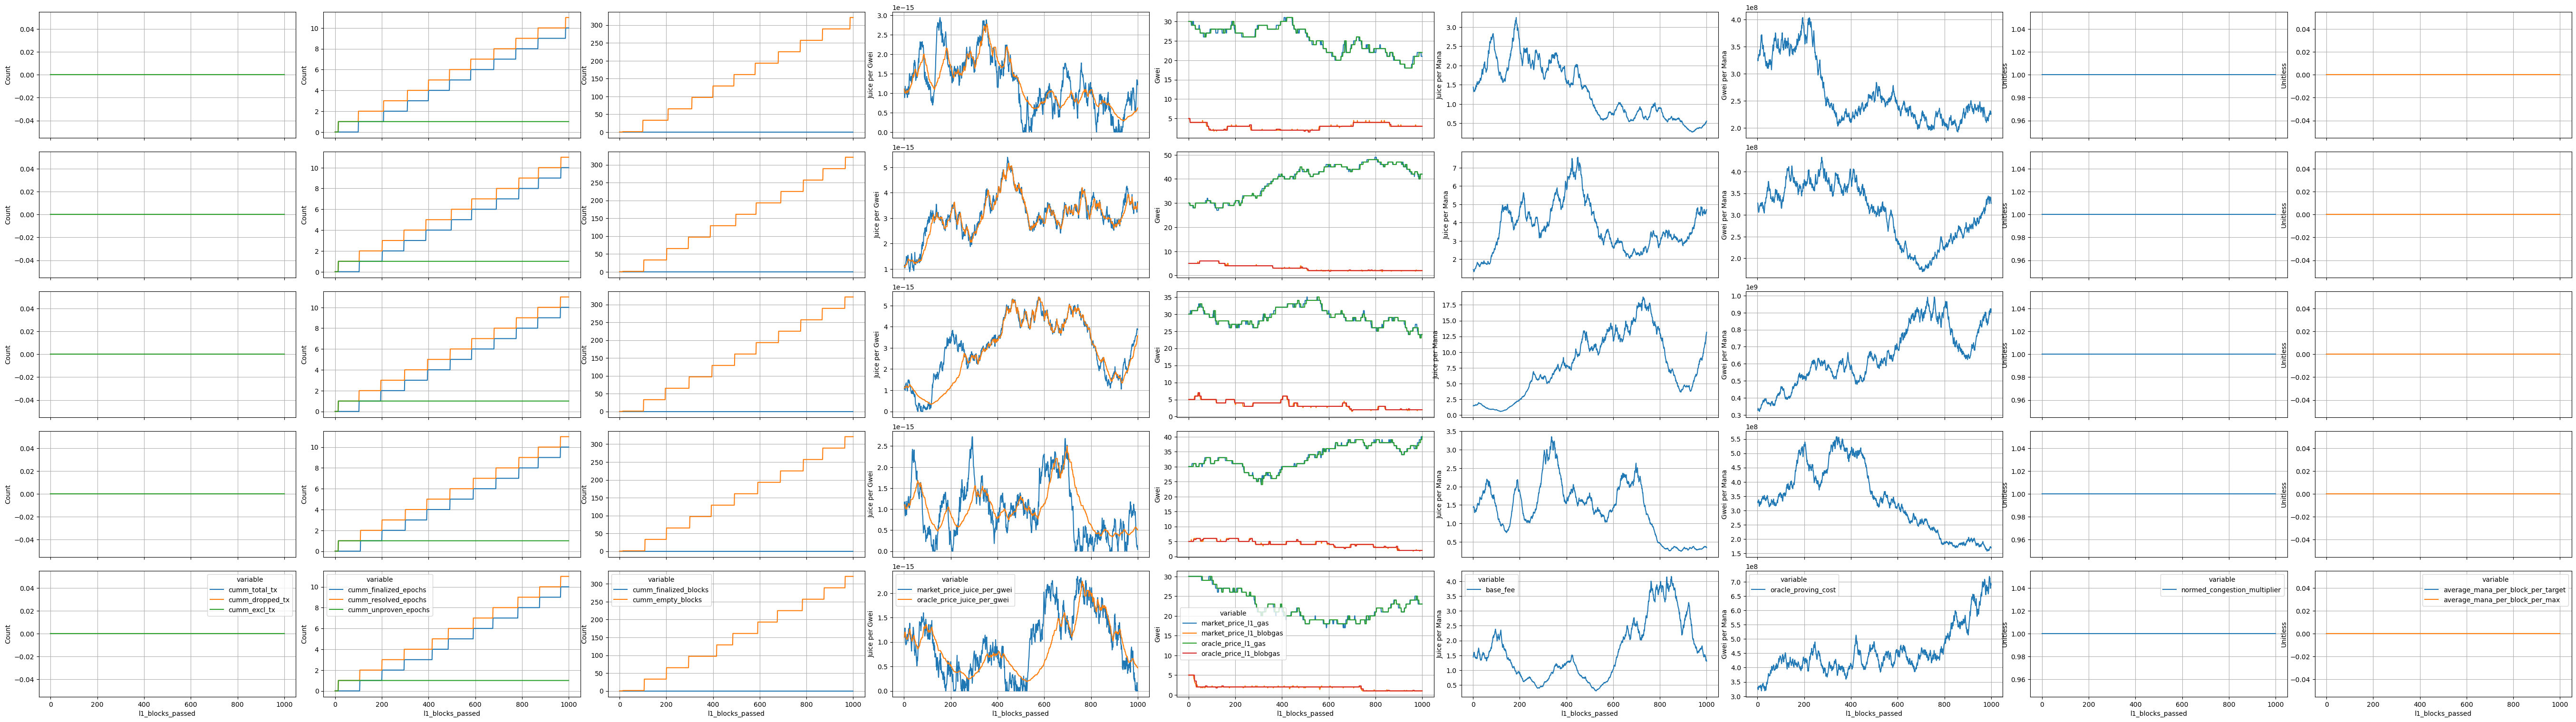

In [6]:
plot_inspect_vars(sim_df)

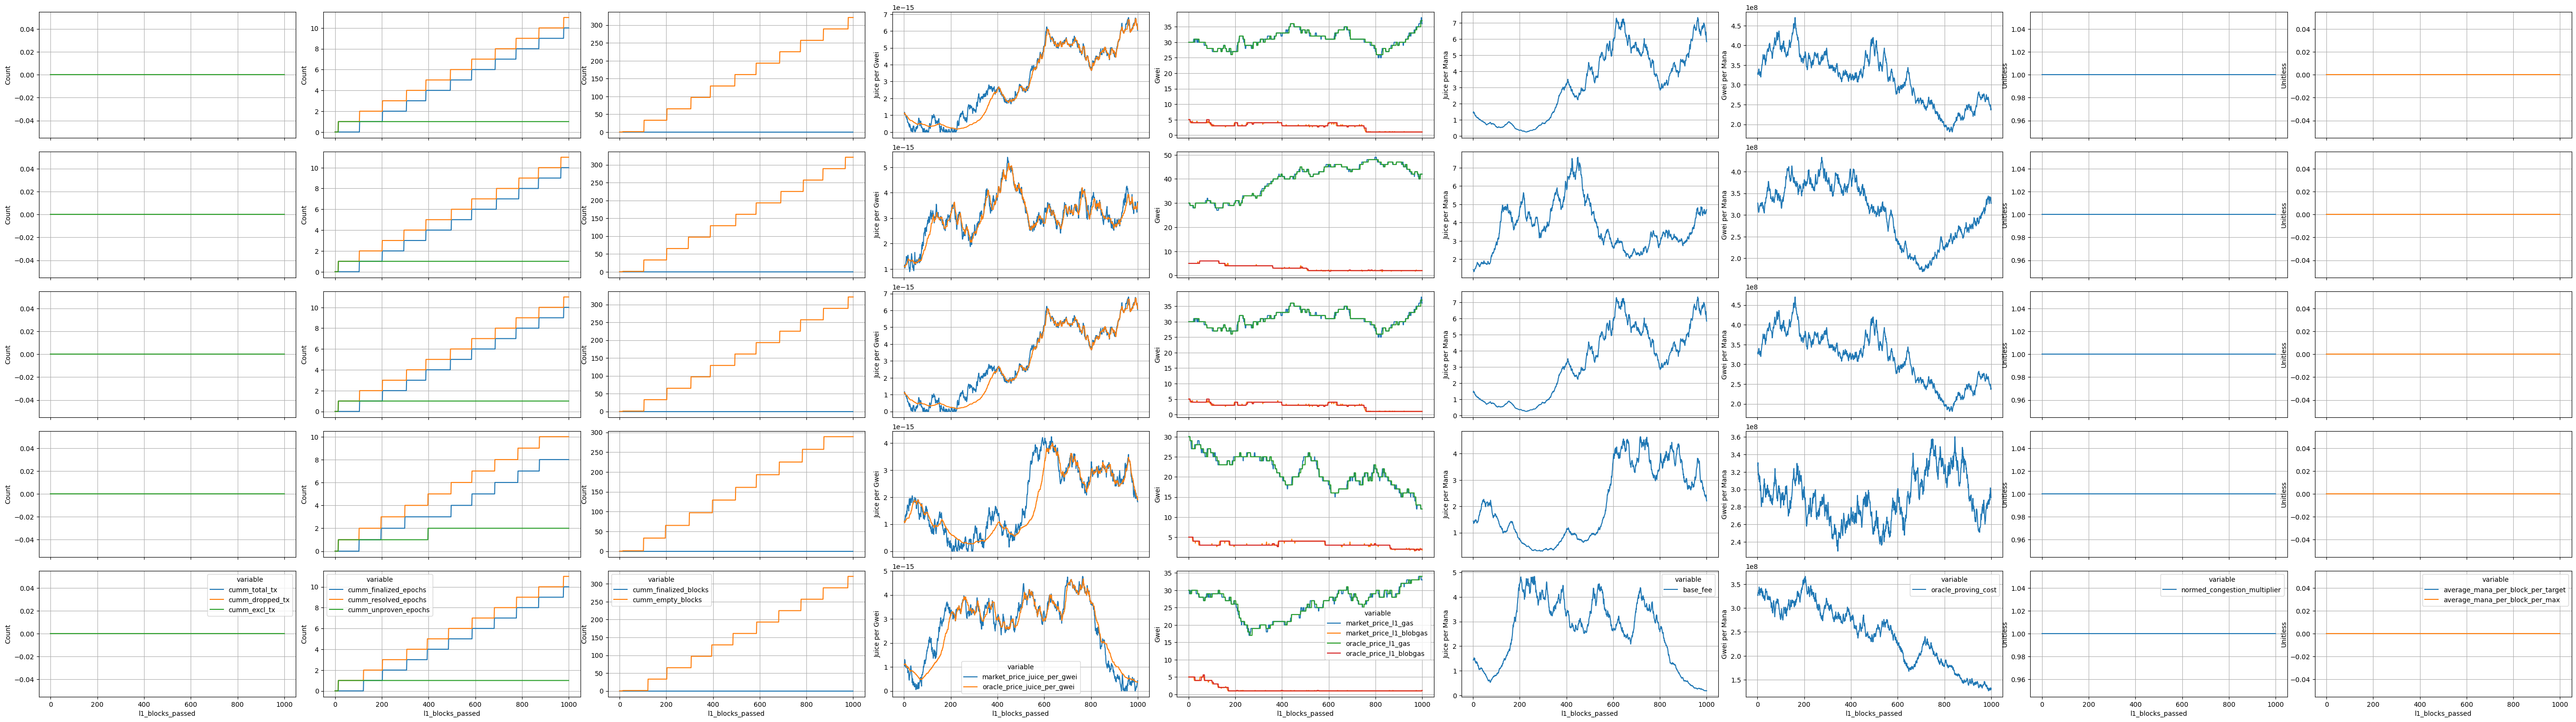

In [7]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 1.0'))

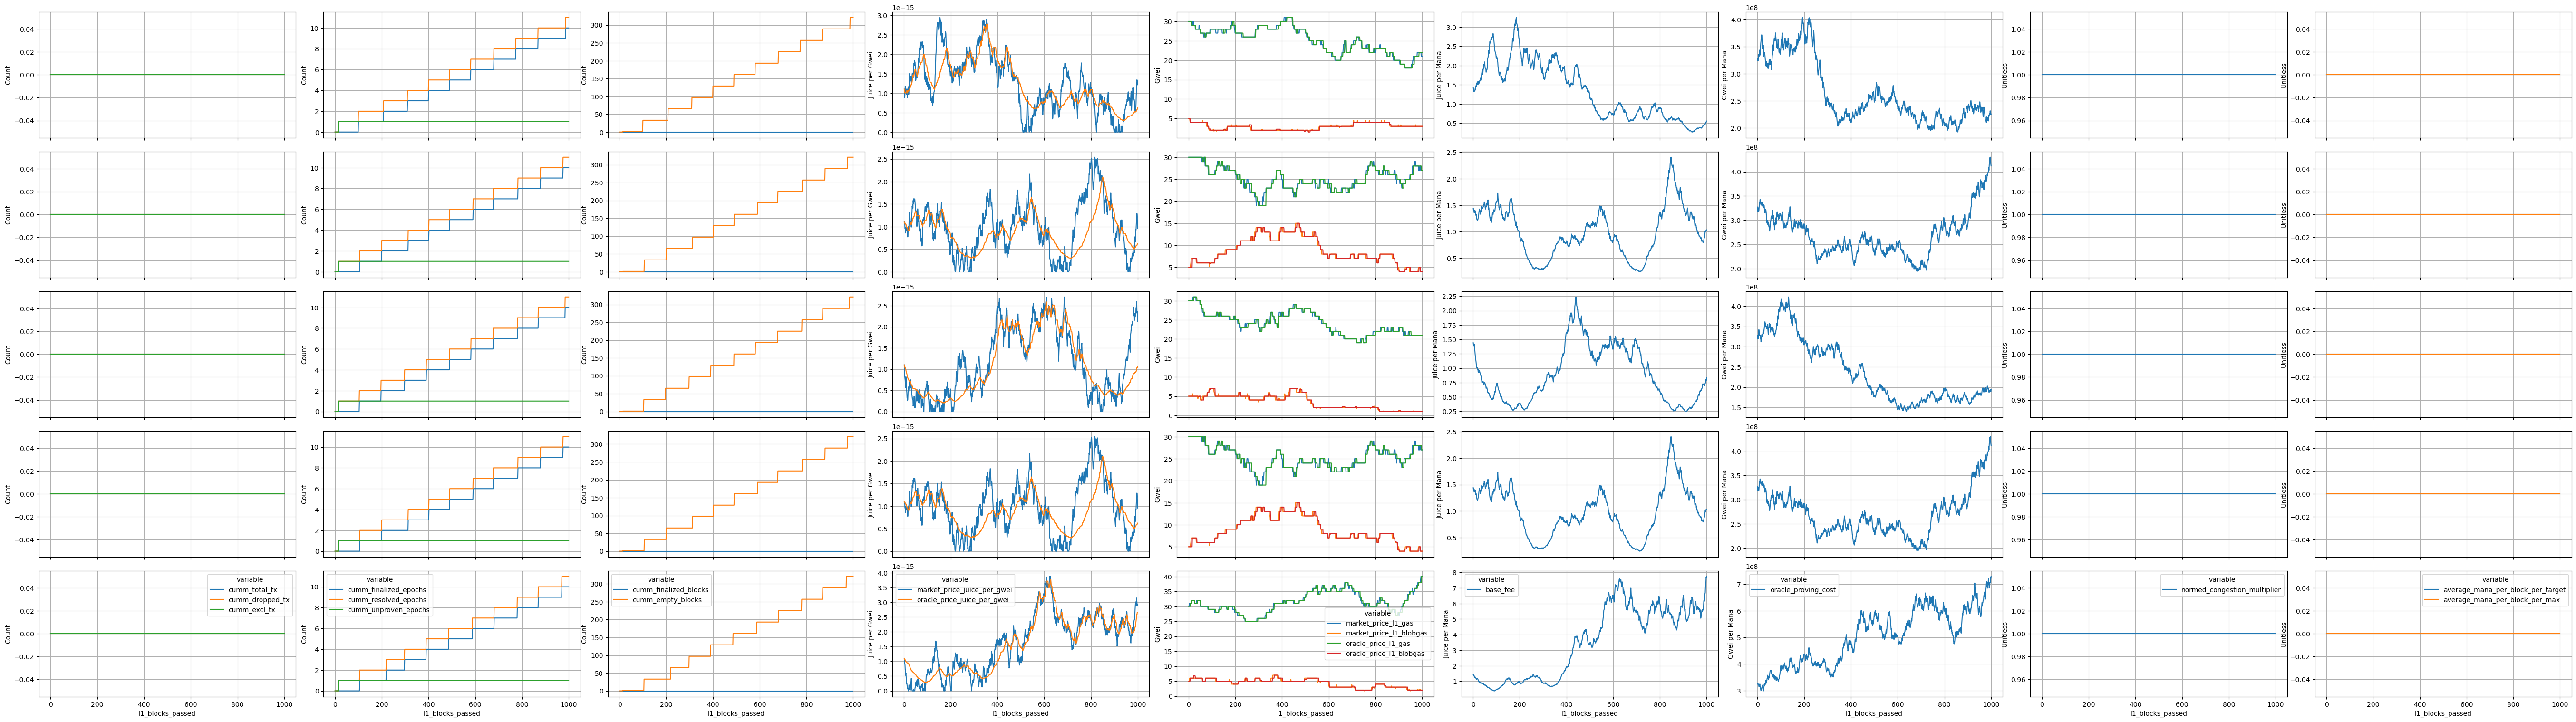

In [8]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 0.0'))

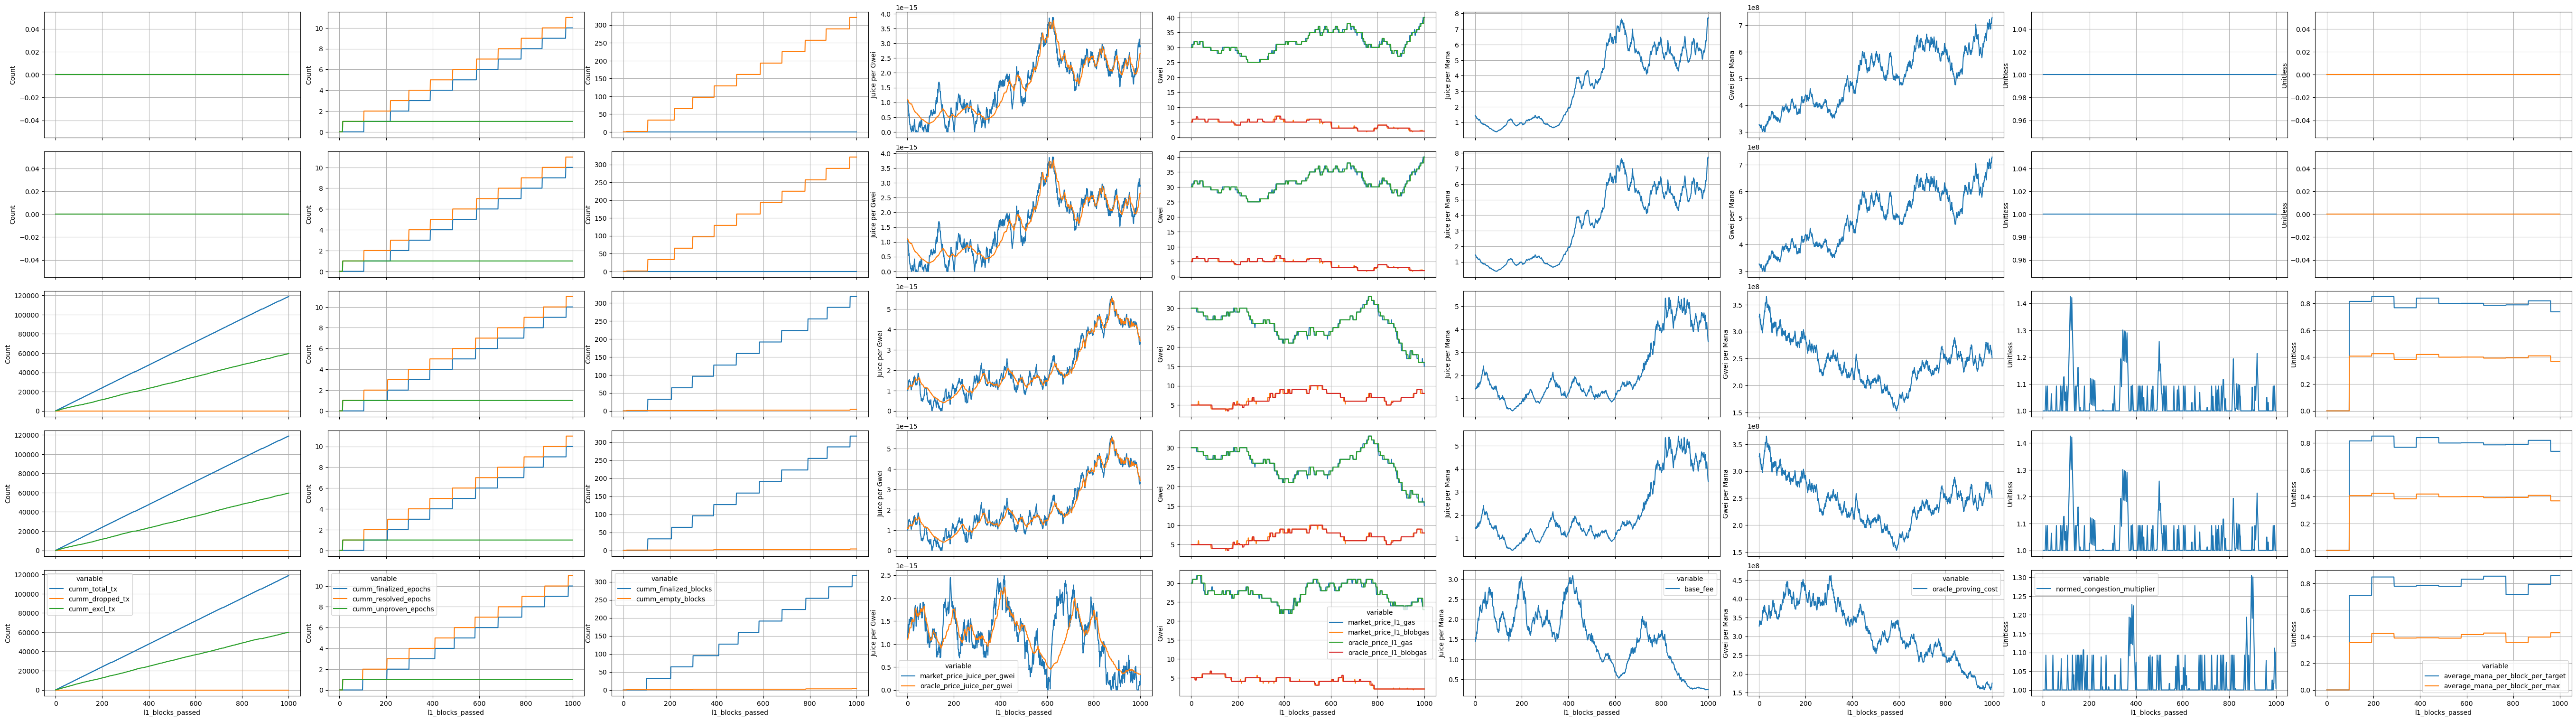

In [9]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 0.0 & MAX_VALIDATORS_TO_SLASH == 1.0'))

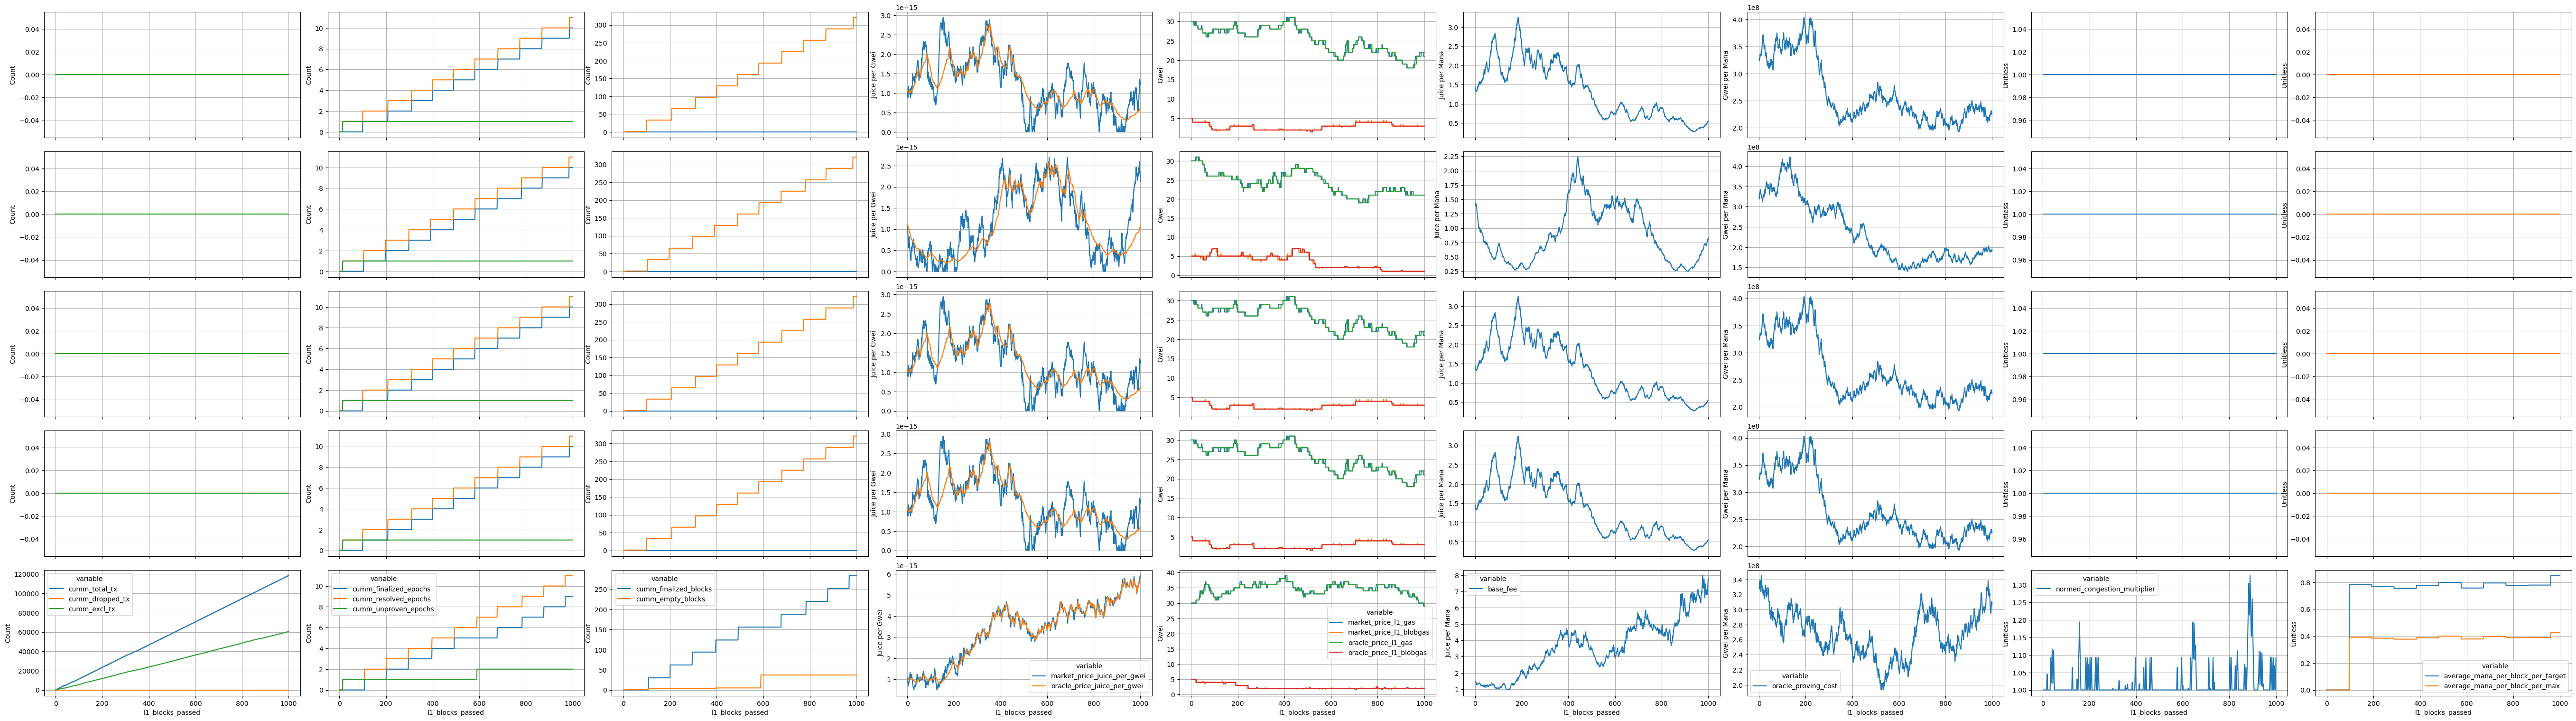

In [10]:
plot_inspect_vars(sim_df.query('SIGNATURE_SKIP_PROBABILITY == 0.0 & MAX_VALIDATORS_TO_SLASH == 0.0'))

<Axes: >

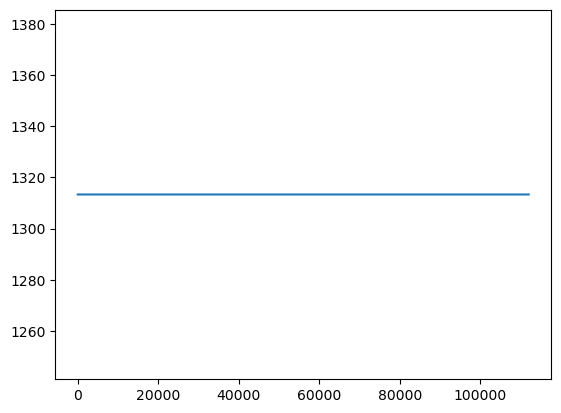

In [11]:
sim_df.agents.map(lambda d: sum(a.stake for a in d.values() if a.uuid != "prover")).plot()